<a href="https://colab.research.google.com/github/mlvlab/DFC609-2022S/blob/master/4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents
* Desicion Tree


## References
* https://scikit-learn.org/stable/modules/tree.html#tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


## python packages



* pydotplus 
* graphviz
* seaborn


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# decision tree
from sklearn import tree

# dataset
from sklearn.datasets import load_iris

# visualization
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

from IPython.display import Image
import graphviz

import seaborn as sns


* Decision Tree model & Visualization

[2]


[Text(0.4, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 5.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

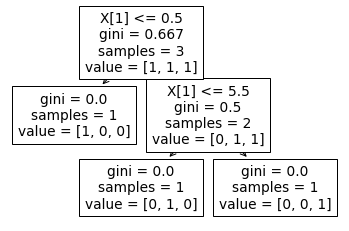

In [2]:
# data
X = [[0, 0], [1, 1], [10, 10]]
y = [0, 1, 2]

# decision tree model
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X, y)

# test 
print(clf.predict([[5., 8.]]))
tree.plot_tree(clf)

[Text(0.5, 0.9166666666666666, 'node #0\nX[2] <= 2.45\ngini = 0.667\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]'),
 Text(0.4230769230769231, 0.75, 'node #1\ngini = 0.0\nsamples = 33.3%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.5769230769230769, 0.75, 'node #2\nX[3] <= 1.75\ngini = 0.5\nsamples = 66.7%\nvalue = [0.0, 0.5, 0.5]'),
 Text(0.3076923076923077, 0.5833333333333334, 'node #3\nX[2] <= 4.95\ngini = 0.168\nsamples = 36.0%\nvalue = [0.0, 0.907, 0.093]'),
 Text(0.15384615384615385, 0.4166666666666667, 'node #4\nX[3] <= 1.65\ngini = 0.041\nsamples = 32.0%\nvalue = [0.0, 0.979, 0.021]'),
 Text(0.07692307692307693, 0.25, 'node #5\ngini = 0.0\nsamples = 31.3%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.23076923076923078, 0.25, 'node #6\ngini = 0.0\nsamples = 0.7%\nvalue = [0.0, 0.0, 1.0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'node #7\nX[3] <= 1.55\ngini = 0.444\nsamples = 4.0%\nvalue = [0.0, 0.333, 0.667]'),
 Text(0.38461538461538464, 0.25, 'node #8\ngini = 0.0\nsamples = 2.0%\nvalue

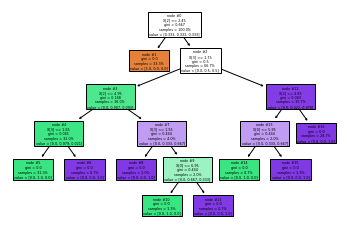

In [3]:
X, y = load_iris(return_X_y=True)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf, filled=True, node_ids=True, proportion=True)


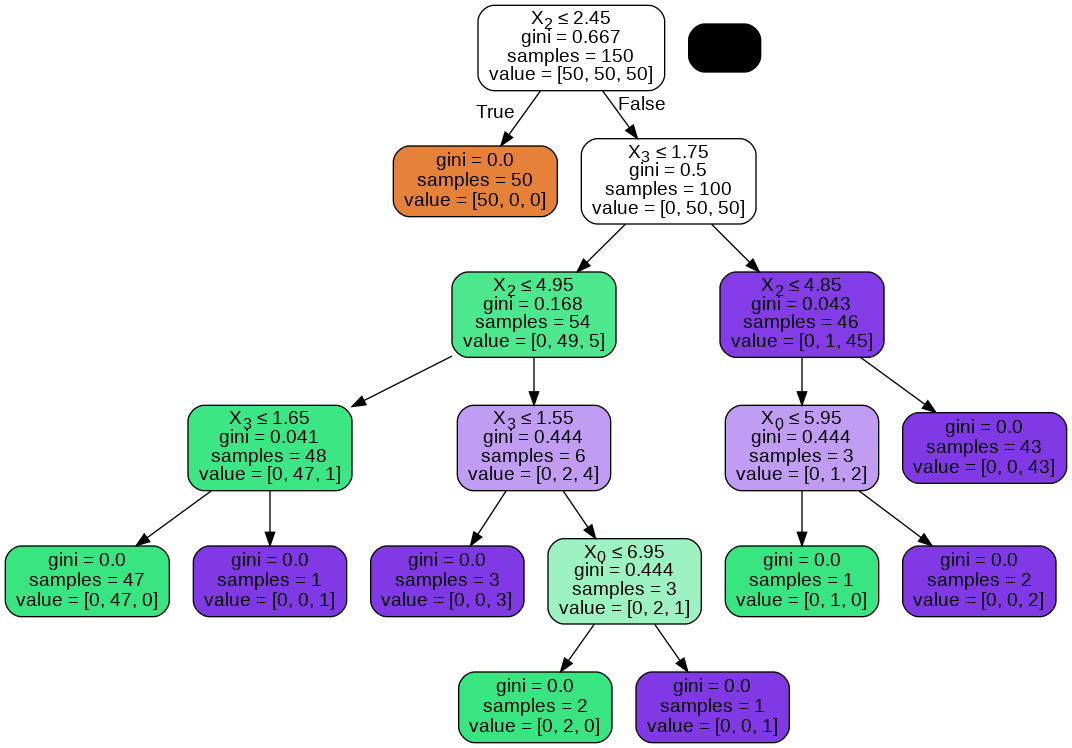

In [4]:
# visualization with dot file (* dot : graph description language)
dot_data = tree.export_graphviz(clf, filled=True, out_file=None, 
                               special_characters=True, max_depth=5,
                               rounded=True, proportion=False)
graph = graphviz.Source(dot_data)
graph.render('iris')
graph = graph_from_dot_data(dot_data)
graph.write_png('iris.png')
Image(graph.create_png())

* iris dataset

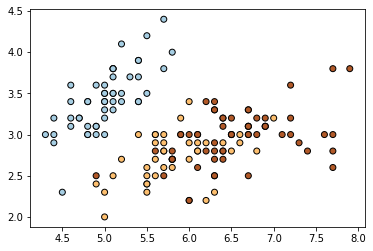

In [5]:
# load iris data 

iris = load_iris()

X = iris.data[:, :2]
y = iris.target

# display
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y)


In [6]:
# model training
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf.fit(X_train, y_train)

# train, test accuracy
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)  

print("train accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("confusion matrix: \n", metrics.
      confusion_matrix(y_test, y_test_pred))

train accuracy:  0.8380952380952381
test accuracy:  0.7777777777777778
confusion matrix: 
 [[15  0  0]
 [ 1  8  6]
 [ 0  3 12]]


In [7]:
# visualization for dicision boundary

def decision_boundary(model, X, y):
    
    fig, ax = plt.subplots()
    
    # dataset
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, 
               cmap='rainbow', edgecolor='k',
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    # x, y data limit
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X, y)
        
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                        np.linspace(ylim_start, ylim_end,num=200))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap='rainbow', #clim=(y.min(), y.max()),
                          zorder=1)
    
    

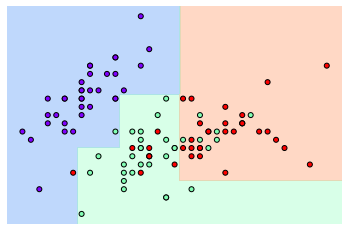

In [8]:
decision_boundary(clf, X_train, y_train)

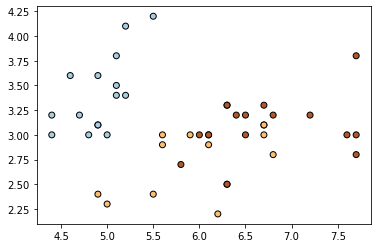

In [9]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')

* parameters : depth, max_leaf_nodes, etc

depth: 2 
 [[14  1  0]
 [ 0  8  7]
 [ 0  3 12]]
depth: 3 
 [[15  0  0]
 [ 1  8  6]
 [ 0  3 12]]
depth: 5 
 [[15  0  0]
 [ 0  8  7]
 [ 0  3 12]]
depth: 7 
 [[15  0  0]
 [ 0  8  7]
 [ 0  3 12]]
depth: 10 
 [[15  0  0]
 [ 0  7  8]
 [ 0  4 11]]


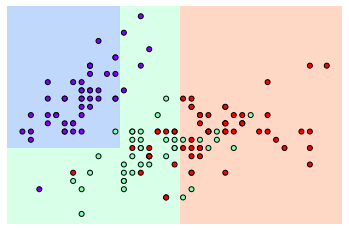

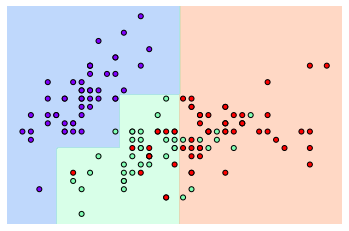

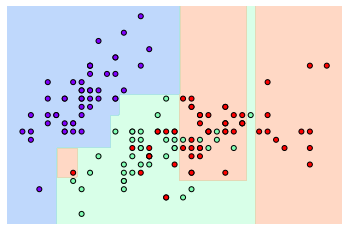

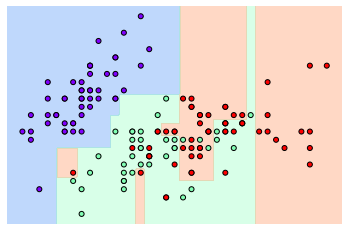

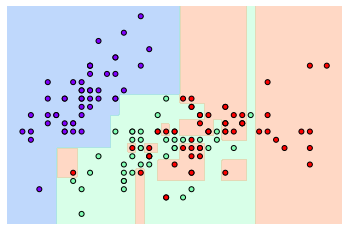

In [10]:
train_accs = []
test_accs = []

depths = [2, 3, 5, 7, 10]

for i, depth in enumerate(depths):
    
    # decision tree model + training
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    clf.fit(X_train, y_train)
    
    # accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)  
    
    train_accs.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accs.append(metrics.accuracy_score(y_test, y_test_pred))

    print("depth:", depth, "\n", metrics.confusion_matrix(y_test, y_test_pred))

    decision_boundary(clf, X, y)
    

In [11]:
for i, depth in enumerate(depths):
    print("depth: ", depth, "\ttrain acc: ", train_accs[i], "\ttest acc: ", test_accs[i])


depth:  2 	train acc:  0.780952380952381 	test acc:  0.7555555555555555
depth:  3 	train acc:  0.8380952380952381 	test acc:  0.7777777777777778
depth:  5 	train acc:  0.8666666666666667 	test acc:  0.7777777777777778
depth:  7 	train acc:  0.8952380952380953 	test acc:  0.7777777777777778
depth:  10 	train acc:  0.9428571428571428 	test acc:  0.7333333333333333


leaf: 2 
 [[14  0  1]
 [ 2  0 13]
 [ 0  0 15]]
leaf: 3 
 [[14  1  0]
 [ 2  6  7]
 [ 0  3 12]]
leaf: 5 
 [[15  0  0]
 [ 0  8  7]
 [ 0  3 12]]
leaf: 7 
 [[15  0  0]
 [ 1  8  6]
 [ 0  3 12]]
leaf: 10 
 [[15  0  0]
 [ 1  8  6]
 [ 0  3 12]]


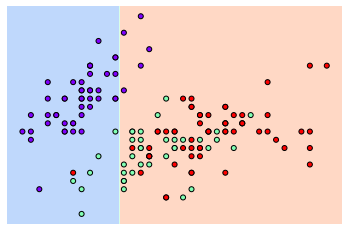

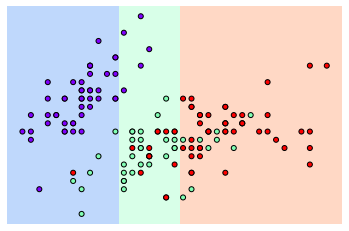

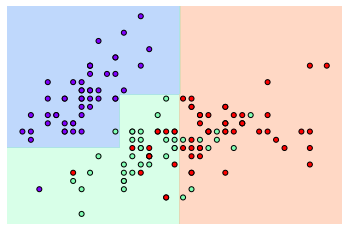

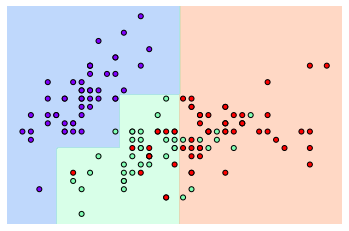

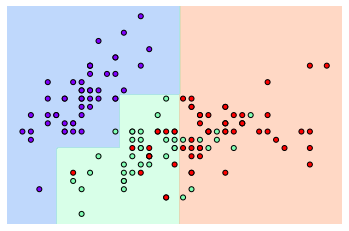

In [12]:
train_accs = []
test_accs = []

leafs = [2, 3, 5, 7, 10]

for i, leaf in enumerate(leafs):
    
    # decision tree model + training
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=leaf, random_state=1)
    clf.fit(X_train, y_train)
    
    # accuracy
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)  
    
    train_accs.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accs.append(metrics.accuracy_score(y_test, y_test_pred))

    print("leaf:", leaf, "\n", metrics.confusion_matrix(y_test, y_test_pred))

    decision_boundary(clf, X, y)
    

In [13]:
for i, leaf in enumerate(leafs):
    print("leaf: ", leaf, "\ttrain acc: ", train_accs[i], "\ttest acc: ", test_accs[i])


leaf:  2 	train acc:  0.6190476190476191 	test acc:  0.6444444444444445
leaf:  3 	train acc:  0.7619047619047619 	test acc:  0.7111111111111111
leaf:  5 	train acc:  0.819047619047619 	test acc:  0.7777777777777778
leaf:  7 	train acc:  0.8380952380952381 	test acc:  0.7777777777777778
leaf:  10 	train acc:  0.8380952380952381 	test acc:  0.7777777777777778


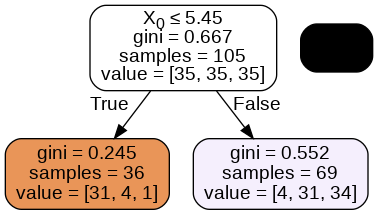

In [14]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=2, random_state=1)
clf.fit(X_train, y_train)
#tree.plot_tree(clf)
dot_data = tree.export_graphviz(clf, filled=True, out_file=None, 
                               special_characters=True, max_depth=5,
                               rounded=True, proportion=False)
graph = graphviz.Source(dot_data)
graph.render('iris')
graph = graph_from_dot_data(dot_data)
graph.write_png('iris.png')
Image(graph.create_png())

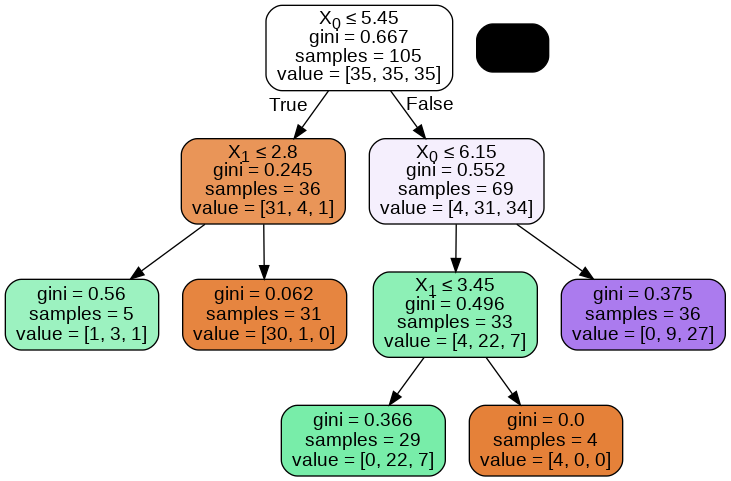

In [15]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=5, random_state=1)
clf.fit(X_train, y_train)
#tree.plot_tree(clf)
dot_data = tree.export_graphviz(clf, filled=True, out_file=None, 
                               special_characters=True, max_depth=5,
                               rounded=True, proportion=False)
graph = graphviz.Source(dot_data)
graph.render('iris')
graph = graph_from_dot_data(dot_data)
graph.write_png('iris.png')
Image(graph.create_png())

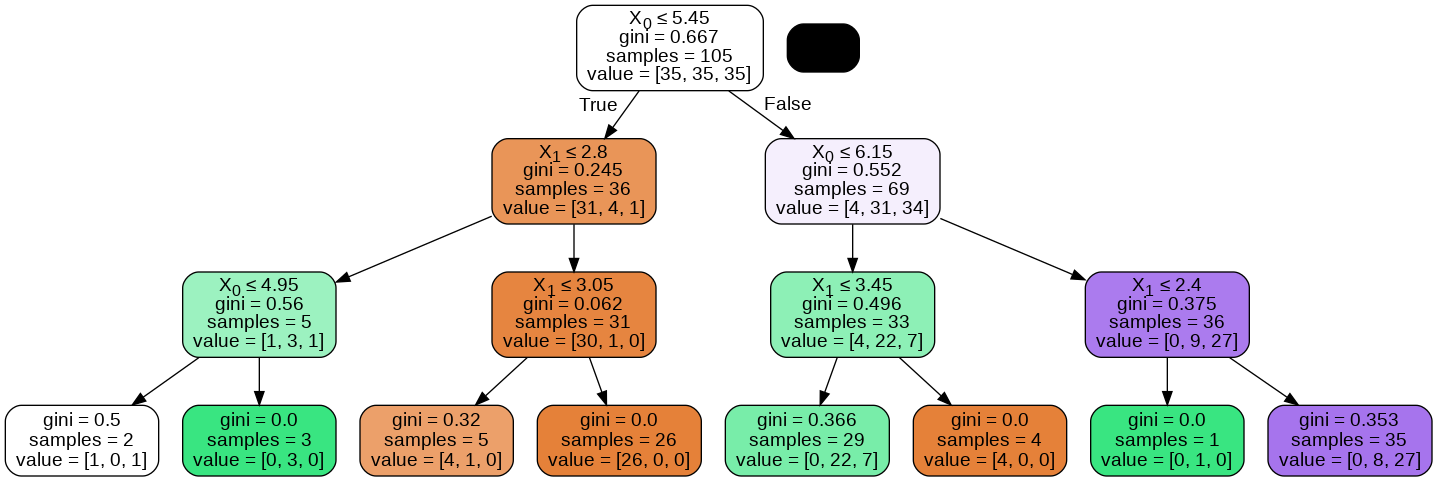

In [16]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=10, random_state=1)
clf.fit(X_train, y_train)
#tree.plot_tree(clf)
dot_data = tree.export_graphviz(clf, filled=True, out_file=None, 
                               special_characters=True, max_depth=5,
                               rounded=True, proportion=False)
graph = graphviz.Source(dot_data)
graph.render('iris')
graph = graph_from_dot_data(dot_data)
graph.write_png('iris.png')
Image(graph.create_png())

feature importances: [0.745 0.255]
name:  sepal length (cm) 	value : 0.7449521264123399
name:  sepal width (cm) 	value : 0.2550478735876602


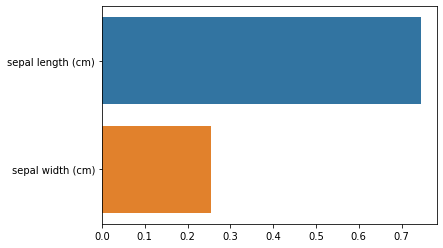

In [17]:
print("feature importances:", np.round(clf.feature_importances_, 3))


for i, v in zip(iris.feature_names[:2], clf.feature_importances_):
    print("name: ", i, "\tvalue :", v)

sns.barplot(x=clf.feature_importances_, y=iris.feature_names[:2])

* circle data

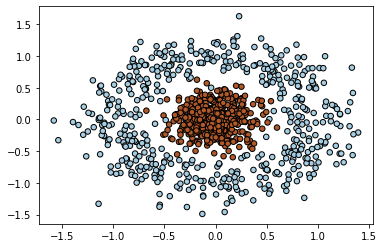

In [18]:
from sklearn.datasets import make_circles


# generate circle dataset
X, y = make_circles(n_samples=1000, noise=0.2, factor=0.05)  # factor: Scale factor between inner and outer circle

# display
plt.scatter(X[:,0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')

# split train/test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)